In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

plt.rcParams["figure.figsize"] = (15,5)
plt.rcParams['lines.linewidth'] = 4

In [7]:
PROJECT_BASE_DIR = "/opt/ml/online_retail_prediction"
INPUT_DIR = os.path.join(PROJECT_BASE_DIR, "input")
TRAIN_CSV = os.path.join(INPUT_DIR, "train.csv")
SUBMISSION_CSV = os.path.join(INPUT_DIR, "sample_submission.csv")

## Glimpse the data

In [8]:
train_df = pd.read_csv(TRAIN_CSV, parse_dates=["order_date"])
submission_df = pd.read_csv(SUBMISSION_CSV)
train_df.head()

,order_id,product_id,description,quantity,order_date,price,customer_id,country,total
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,11.4675,13085,United Kingdom,137.61
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,11.1375,13085,United Kingdom,133.65
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,11.1375,13085,United Kingdom,133.65
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,3.4650,13085,United Kingdom,166.32
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,2.0625,13085,United Kingdom,49.50


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780502 entries, 0 to 780501
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   order_id     780502 non-null  object        
 1   product_id   780502 non-null  object        
 2   description  780502 non-null  object        
 3   quantity     780502 non-null  int64         
 4   order_date   780502 non-null  datetime64[ns]
 5   price        780502 non-null  float64       
 6   customer_id  780502 non-null  int64         
 7   country      780502 non-null  object        
 8   total        780502 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 53.6+ MB


In [10]:
# Null item 개수 확인
train_df.isna().sum()

order_id       0
product_id     0
description    0
quantity       0
order_date     0
price          0
customer_id    0
country        0
total          0
dtype: int64

In [11]:
# 전체 개수로 나눠서 결측치 데이터 비율 확인
train_df.isna().sum() / train_df.shape[0] 

order_id       0.0
product_id     0.0
description    0.0
quantity       0.0
order_date     0.0
price          0.0
customer_id    0.0
country        0.0
total          0.0
dtype: float64

In [12]:
train_df.describe()

,quantity,price,customer_id,total
count,780502.000000,780502.000000,780502.000000,780502.000000
mean,12.623307,6.140931,15313.393466,33.715373
std,143.906302,119.042266,1695.765797,274.207403
min,-74215.000000,0.000000,12346.000000,-127352.940000
25%,2.000000,2.062500,13963.000000,7.260000
50%,5.000000,3.217500,15239.000000,19.470000
75%,12.000000,6.187500,16788.000000,32.175000
max,74215.000000,64300.500000,18287.000000,127352.940000


In [13]:
print(f'train_retail shape is {train_df.shape}')
print(f'sample_submission shape is {submission_df.shape}')

train_retail shape is (780502, 9)
sample_submission shape is (5914, 2)


In [14]:
# train data의 모든 고객이 submssion에 포함되어 있는지 확인
print(np.sum(submission_df["customer_id"].isin(train_df["customer_id"].unique())))

5914


In [15]:
# train set의 기간 파악
print(train_df['order_date'].min())
print(train_df['order_date'].max())

2009-12-01 07:45:00
2011-11-30 17:42:00


In [16]:
# unique한 customer_id 수
len(train_df['customer_id'].unique())

5914

## 한 명 단위로 Data를 보면서 어떻게 구조화 되어있는지 확인

In [17]:
train_df[train_df.customer_id == train_df.customer_id.min()]

,order_id,product_id,description,quantity,order_date,price,customer_id,country,total
21447,491725,TEST001,This is a test product.,10,2009-12-14 08:34:00,7.4250,12346,United Kingdom,74.2500
21702,491742,TEST001,This is a test product.,5,2009-12-14 11:00:00,7.4250,12346,United Kingdom,37.1250
21705,491744,TEST001,This is a test product.,5,2009-12-14 11:02:00,7.4250,12346,United Kingdom,37.1250
28492,492718,TEST001,This is a test product.,5,2009-12-18 10:47:00,7.4250,12346,United Kingdom,37.1250
28504,492722,TEST002,This is a test product.,1,2009-12-18 10:55:00,1.6500,12346,United Kingdom,1.6500
31276,493410,TEST001,This is a test product.,5,2010-01-04 09:24:00,7.4250,12346,United Kingdom,37.1250
31278,493412,TEST001,This is a test product.,5,2010-01-04 09:53:00,7.4250,12346,United Kingdom,37.1250
37892,494450,TEST001,This is a test product.,5,2010-01-14 13:50:00,7.4250,12346,United Kingdom,37.1250
44909,495295,TEST001,This is a test product.,5,2010-01-22 13:30:00,7.4250,12346,United Kingdom,37.1250
49055,C495800,ADJUST,Adjustment by john on 26/01/2010 17,-1,2010-01-26 17:27:00,170.7750,12346,United Kingdom,-170.7750


In [18]:
print(len(train_df['product_id'].unique()))
number_product_id = np.char.isalpha(list(train_df['product_id'].unique()))
print(train_df['product_id'].unique()[number_product_id])

4645
['POST' 'D' 'M' 'PADS' 'ADJUST' 'DOT' 'CRUK']


# 1. 어떻게 접근해서 Data를 풀어 나갈 수 있을까?
 - 로그 데이터니, 고객의 구매 기록을 시계열 처럼 펼처서 보도록 하겠습니다.
 - 그렇게 하기 위해서는 특정 시간별로 행들을 묶어 줘서 봐야합니다.
 - 저는 간단하게 월단위로 total을 sum해서 해당 고객의 total값을 봐보도록 하겠습니다.

In [19]:
train_df['year_month'] = pd.to_datetime(train_df['order_date']).dt.strftime("%Y-%m")

In [20]:
train_df

,order_id,product_id,description,quantity,order_date,price,customer_id,country,total,year_month
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,11.4675,13085,United Kingdom,137.6100,2009-12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,11.1375,13085,United Kingdom,133.6500,2009-12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,11.1375,13085,United Kingdom,133.6500,2009-12
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,3.4650,13085,United Kingdom,166.3200,2009-12
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,2.0625,13085,United Kingdom,49.5000,2009-12
...,...,...,...,...,...,...,...,...,...,...
780497,C579886,22197,POPCORN HOLDER,-1,2011-11-30 17:39:00,1.4025,15676,United Kingdom,-1.4025,2011-11
780498,C579886,23146,TRIPLE HOOK ANTIQUE IVORY ROSE,-1,2011-11-30 17:39:00,5.4285,15676,United Kingdom,-5.4285,2011-11
780499,C579887,84946,ANTIQUE SILVER T-LIGHT GLASS,-1,2011-11-30 17:42:00,2.0625,16717,United Kingdom,-2.0625,2011-11
780500,C579887,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,-1,2011-11-30 17:42:00,13.1175,16717,United Kingdom,-13.1175,2011-11


In [21]:
total_per_month = train_df.groupby('year_month')['total'].sum()
total_per_month

year_month
2009-12    1.089206e+06
2010-01    8.752202e+05
2010-02    8.045341e+05
2010-03    1.045142e+06
2010-04    9.207129e+05
2010-05    9.204911e+05
2010-06    9.384945e+05
2010-07    9.254608e+05
2010-08    9.656781e+05
2010-09    1.284558e+06
2010-10    1.586509e+06
2010-11    1.862892e+06
2010-12    9.114152e+05
2011-01    7.816576e+05
2011-02    7.186312e+05
2011-03    9.546507e+05
2011-04    7.016174e+05
2011-05    1.067569e+06
2011-06    1.001323e+06
2011-07    9.456353e+05
2011-08    1.014879e+06
2011-09    1.533438e+06
2011-10    1.605956e+06
2011-11    1.859245e+06
Name: total, dtype: float64

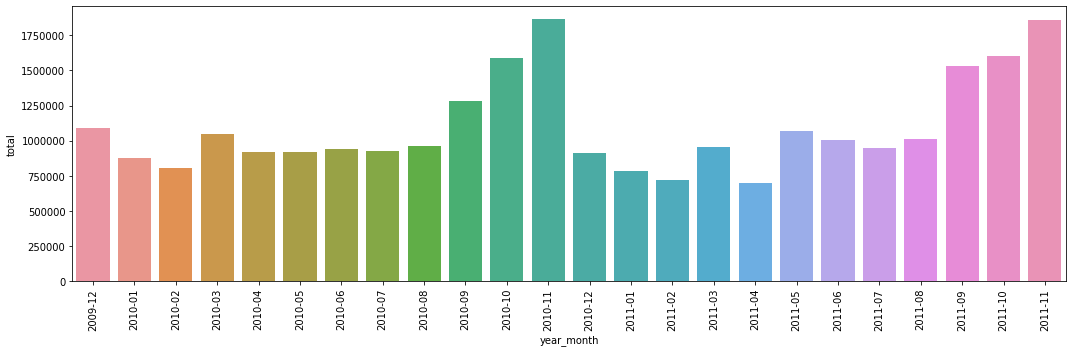

In [22]:
sns.barplot(x=total_per_month.index, y=total_per_month)
plt.xticks(rotation=90)
plt.tight_layout()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


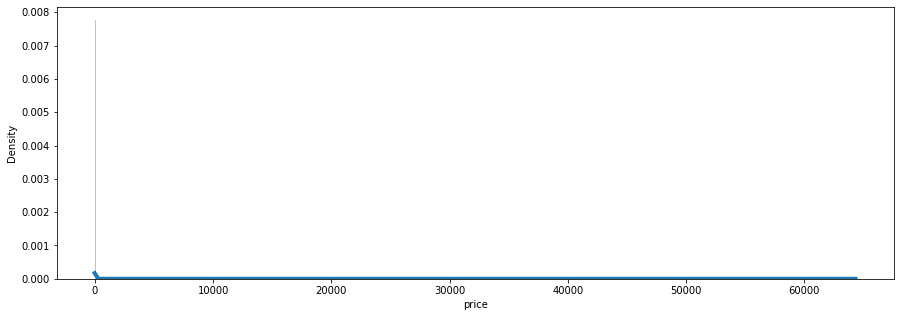

In [25]:
sns.distplot(train_df.price, bins=500)